<a href="https://colab.research.google.com/github/Nesjesramrey/Modulo-4/blob/main/M4S02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOXSPLOTS**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/melbourne_housing-clean.csv')

In [ ]:
df.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


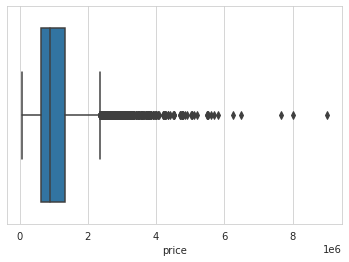

In [ ]:
sns.set_style("whitegrid") # Establece el estilo de la gráfica (https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.boxplot(x=df['price'])

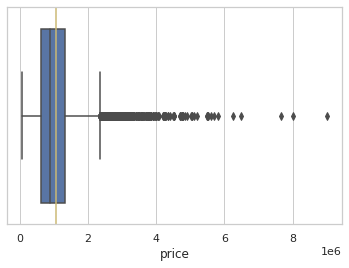

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y') # (valor de la línea, color)

In [ ]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inferior = df['price'] > df['price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['price'] < df['price'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

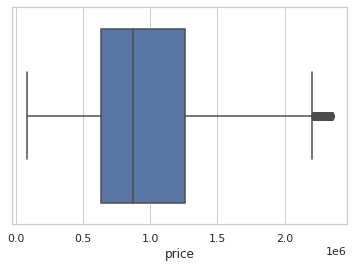

In [ ]:
sns.boxplot(x=df_filtrado['price'])

# **TABLA DE FRECUENCIAS**

In [ ]:
prices = df['price']
prices.max() - prices.min() #rango

8915000.0

In [ ]:
pd.cut(prices, 20) # cut divide la serie en segmentos

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64]): [(76085.0, 530750.0] < (530750.0, 976500.0] < (976500.0, 1422250.0] <
                                     (1422250.0, 1868000.0] ... (7217000.0, 7662750.0] <
                                     (7662750.0, 8108500.0] < (8108500.0, 8554250.0] <
                                     (8554250.0, 9000000.0]]

In [ ]:
segmentos = pd.cut(prices, 20)

df['price'].groupby(segmentos).count() # SELECT price,  count(*) FROM df GROUP BY price

price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

# **HISTOGRAMA**

In [ ]:
sns.set(style='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


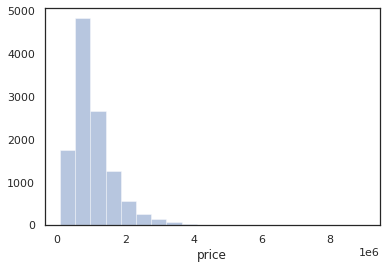

In [ ]:
sns.distplot(df['price'], kde=False, norm_hist=False, bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


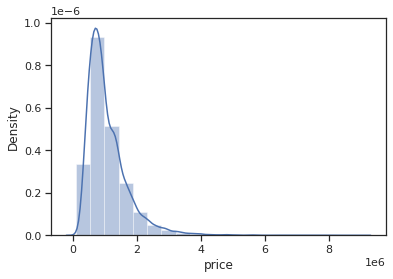

In [ ]:
sns.distplot(df['price'], kde=True, norm_hist=False, bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


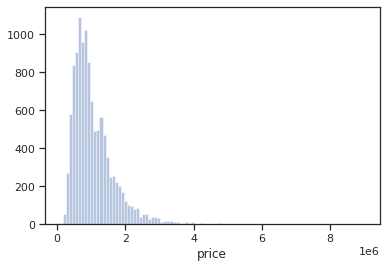

In [ ]:
sns.set(style='ticks')
sns.distplot(df['price'], kde=False, norm_hist=False, bins=100)

# **DESCRIBIENDO HISTOGRAMAS**

In [ ]:
from scipy.stats import skew, kurtosis

sns.set(style='white')

In [ ]:
normal = np.random.normal(loc=0, scale=5, size=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


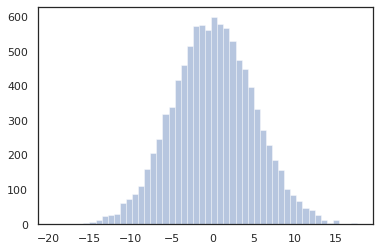

In [ ]:
sns.distplot(normal, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: -0.007484261281481608
Asimetría: 0.017048523511225232


In [ ]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


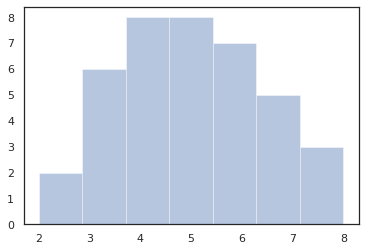

In [ ]:
sns.distplot(cola_corta, kde=False, norm_hist=False, bins=7);

In [ ]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


In [ ]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)


[ 1.99662968  0.55473271 -0.03395906 ...  0.57445652 -3.53916651
 -0.03783296]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


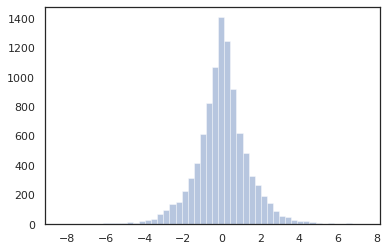

In [ ]:
sns.distplot(cola_larga, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 2.533122679212248
Asimetría: -0.028457083958306314


In [ ]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


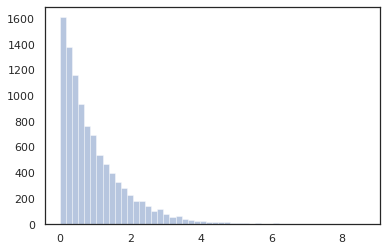

In [ ]:
sns.distplot(asimetria_positiva, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 5.702037367338136
Asimetría: 1.996202511823735


In [ ]:
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


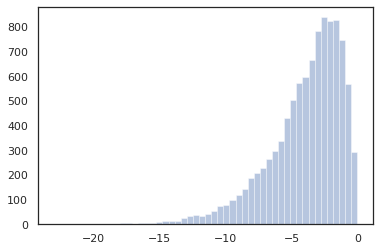

In [ ]:
sns.distplot(asimetria_negativa, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 2.8417733267659173
Asimetría: -1.4006786396522903


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


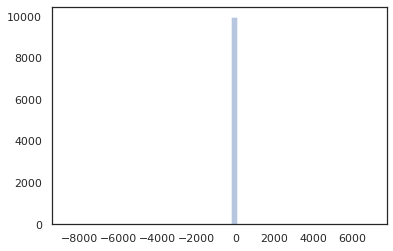

In [ ]:
cauchy = np.random.standard_cauchy(size=10000)
sns.distplot(cauchy, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(cauchy)}')
print(f'Asimetría: {skew(cauchy)}')

Curtosis: 3572.501379393258
Asimetría: -17.21607020485635


In [ ]:
uniform = np.random.uniform(low=-1, high=0, size=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


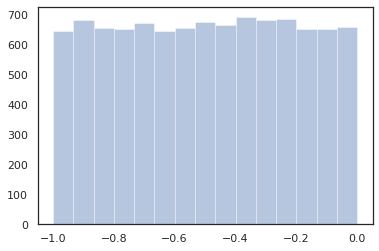

In [ ]:
sns.distplot(uniform, bins=15, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(uniform)}')
print(f'Asimetría: {skew(uniform)}')

Curtosis: -1.1966743029404605
Asimetría: -0.010563687867016319


In [ ]:
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


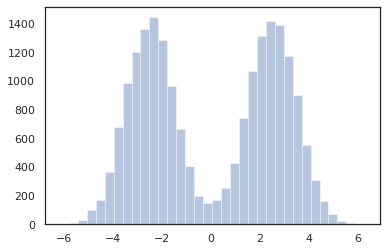

In [ ]:
sns.distplot(bimodal, kde=False, norm_hist=False);


In [ ]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.4904648723228762
Asimetría: 0.001119561536953569


# GRAFICAS DE **DENSIDAD**

In [ ]:
sns.set(style='whitegrid')


In [ ]:
import numpy as np


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


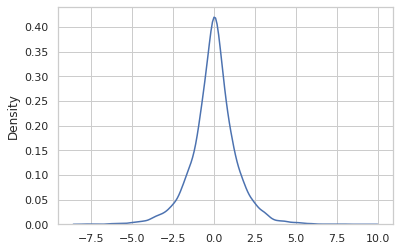

In [ ]:
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.distplot(laplace, hist=False);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


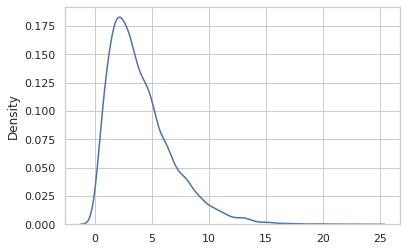

In [ ]:
chisquare = np.random.chisquare(4, size=10000)
sns.distplot(chisquare, hist=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

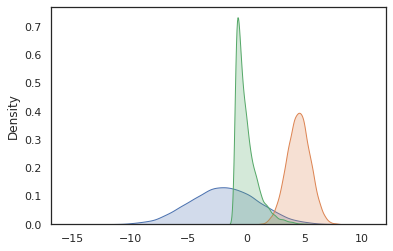

In [ ]:
sns.set(style='white')

normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.distplot(normal_1, hist = False, kde_kws = {'shade': True})
sns.distplot(normal_2, hist = False, kde_kws = {'shade': True})
sns.distplot(exponential, hist = False, kde_kws = {'shade': True})

# **RETO 1**

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/near_earth_objects-jan_feb_1995-clean.csv')

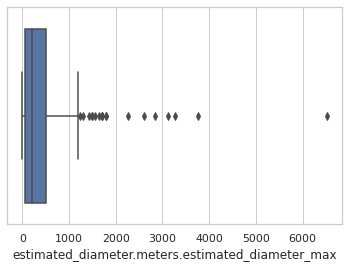

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x=df_1['estimated_diameter.meters.estimated_diameter_max'])

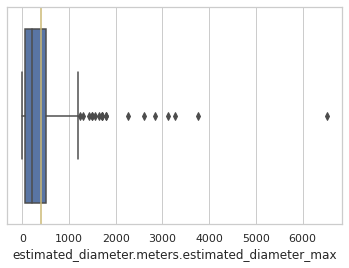

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_1['estimated_diameter.meters.estimated_diameter_max'])
plt.axvline(df_1['estimated_diameter.meters.estimated_diameter_max'].mean(), c='y') # (valor de la línea, color)

In [ ]:
iqr = df_1['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75) - df_1['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25)
filtro_inferior = df_1['estimated_diameter.meters.estimated_diameter_max'] > df_1['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_1['estimated_diameter.meters.estimated_diameter_max'] < df_1['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_1[filtro_inferior & filtro_superior]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


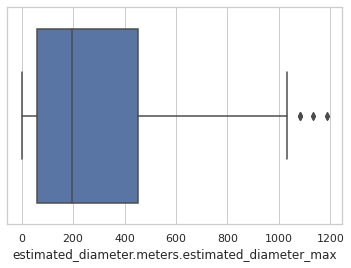

In [ ]:
sns.boxplot(df_filtrado['estimated_diameter.meters.estimated_diameter_max'])



In [ ]:
df_2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Datasets/new_york_times_bestsellers-clean.json')

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/melbourne_housing-clean.csv')

# **RETO 2**

In [ ]:
diameter_max = df_1['estimated_diameter.meters.estimated_diameter_max']
diameter_max.max() - diameter_max.min()

6513.905031051

In [ ]:
pd.cut(diameter_max, 20)

0      (980.065, 1305.76]
1       (-3.535, 328.674]
2       (-3.535, 328.674]
3       (-3.535, 328.674]
4       (-3.535, 328.674]
              ...        
328    (980.065, 1305.76]
329    (980.065, 1305.76]
330    (328.674, 654.369]
331    (654.369, 980.065]
332     (-3.535, 328.674]
Name: estimated_diameter.meters.estimated_diameter_max, Length: 333, dtype: category
Categories (20, interval[float64]): [(-3.535, 328.674] < (328.674, 654.369] < (654.369, 980.065] <
                                     (980.065, 1305.76] ... (5214.103, 5539.798] <
                                     (5539.798, 5865.493] < (5865.493, 6191.189] < (6191.189, 6516.884]]

In [ ]:
segmentos = pd.cut(diameter_max, 20)

df_1['estimated_diameter.meters.estimated_diameter_max'].groupby(segmentos).count()

estimated_diameter.meters.estimated_diameter_max
(-3.535, 328.674]       207
(328.674, 654.369]       67
(654.369, 980.065]       24
(980.065, 1305.76]       18
(1305.76, 1631.455]       4
(1631.455, 1957.15]       6
(1957.15, 2282.846]       1
(2282.846, 2608.541]      1
(2608.541, 2934.236]      1
(2934.236, 3259.931]      1
(3259.931, 3585.627]      1
(3585.627, 3911.322]      1
(3911.322, 4237.017]      0
(4237.017, 4562.712]      0
(4562.712, 4888.408]      0
(4888.408, 5214.103]      0
(5214.103, 5539.798]      0
(5539.798, 5865.493]      0
(5865.493, 6191.189]      0
(6191.189, 6516.884]      1
Name: estimated_diameter.meters.estimated_diameter_max, dtype: int64

# **RETO 2.1**

In [ ]:
sns.set(style='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


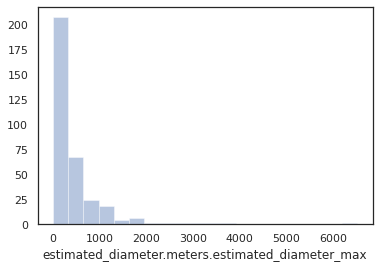

In [ ]:
sns.distplot(df_1['estimated_diameter.meters.estimated_diameter_max'], kde=False, norm_hist=False, bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


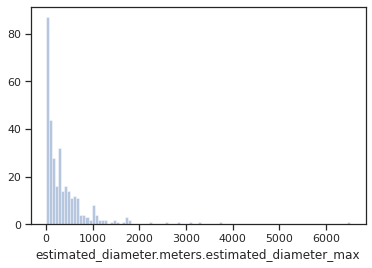

In [ ]:
sns.set(style='ticks')
sns.distplot(df_1['estimated_diameter.meters.estimated_diameter_max'], kde=False, norm_hist=False, bins=100)

# **RETO 3**

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes-clean.csv', index_col=0)

In [ ]:
diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
sns.set(style='dark')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


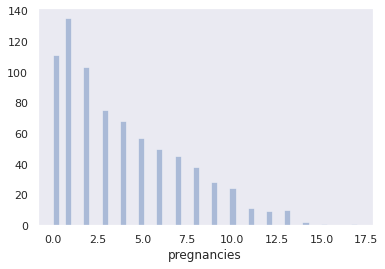

In [ ]:
sns.distplot(diabetes['pregnancies'], kde=False, norm_hist=False, bins=50)

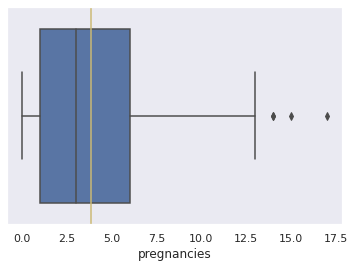

In [ ]:
sns.boxplot(x=diabetes['pregnancies'])
plt.axvline(diabetes['pregnancies'].mean(), c='y')

In [ ]:
iqr = diabetes['pregnancies'].quantile(0.75) - diabetes['pregnancies'].quantile(0.25)
filtro_inferior = diabetes['pregnancies'] > diabetes['pregnancies'].quantile(0.25) - (iqr * 1.5)
filtro_superior = diabetes['pregnancies'] < diabetes['pregnancies'].quantile(0.75) + (iqr * 1.5)

df_filtrado_preg = diabetes[filtro_inferior & filtro_superior]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


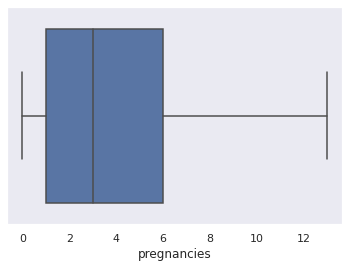

In [ ]:
sns.boxplot(df_filtrado_preg['pregnancies'])

In [ ]:
diabetes['pregnancies'].groupby(pd.cut(diabetes['pregnancies'], 5)).count()

pregnancies
(-0.017, 3.4]    424
(3.4, 6.8]       175
(6.8, 10.2]      135
(10.2, 13.6]      30
(13.6, 17.0]       4
Name: pregnancies, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.pregnancies)}')
print(f'Asimetría: {skew(diabetes.pregnancies)}')

Curtosis: 0.15038273760948462
Asimetría: 0.8999119408414357


In [ ]:
import numpy as np


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


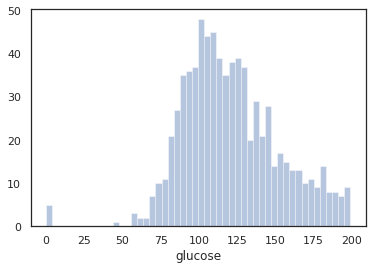

In [ ]:
sns.distplot(diabetes['glucose'], kde=False, norm_hist=False, bins=50)

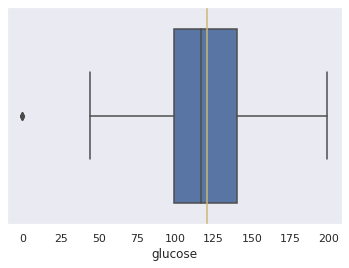

In [ ]:
sns.boxplot(x=diabetes['glucose'])
plt.axvline(diabetes['glucose'].mean(), c='y')

In [ ]:
diabetes['glucose'].groupby(pd.cut(diabetes['glucose'], 5)).count()

glucose
(-0.199, 39.8]      5
(39.8, 79.6]       36
(79.6, 119.4]     367
(119.4, 159.2]    258
(159.2, 199.0]    102
Name: glucose, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.glucose)}')
print(f'Asimetría: {skew(diabetes.glucose)}')

Curtosis: 0.6288133337300685
Asimetría: 0.17341395519987735


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


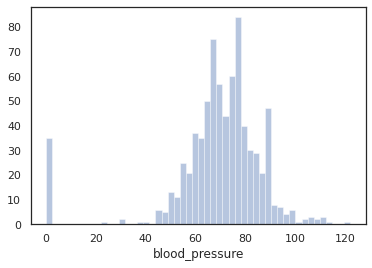

In [ ]:
sns.distplot(diabetes['blood_pressure'], kde=False, norm_hist=False, bins=50)

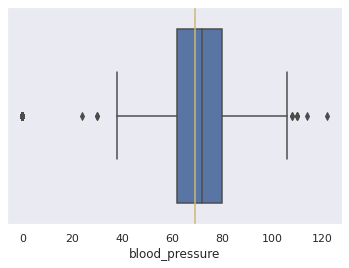

In [ ]:
sns.boxplot(x=diabetes['blood_pressure'])
plt.axvline(diabetes['blood_pressure'].mean(), c='y')

In [ ]:
diabetes['blood_pressure'].groupby(pd.cut(diabetes['blood_pressure'], 5)).count()

blood_pressure
(-0.122, 24.4]     36
(24.4, 48.8]       15
(48.8, 73.2]      368
(73.2, 97.6]      330
(97.6, 122.0]      19
Name: blood_pressure, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.blood_pressure)}')
print(f'Asimetría: {skew(diabetes.blood_pressure)}')

Curtosis: 5.138690662525438
Asimetría: -1.8400052311728738


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


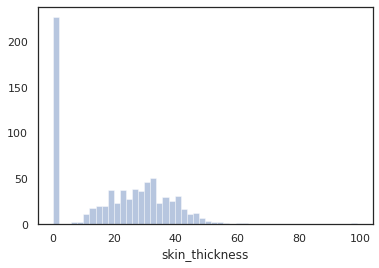

In [ ]:
sns.distplot(diabetes['skin_thickness'], kde=False, norm_hist=False, bins=50)

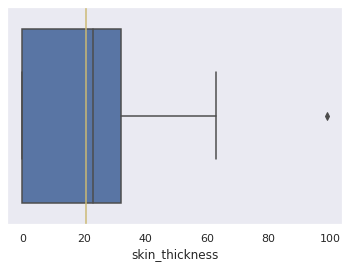

In [ ]:
sns.boxplot(x=diabetes['skin_thickness'])
plt.axvline(diabetes['skin_thickness'].mean(), c='y')

In [ ]:
diabetes['skin_thickness'].groupby(pd.cut(diabetes['skin_thickness'], 5)).count()

skin_thickness
(-0.099, 19.8]    338
(19.8, 39.6]      340
(39.6, 59.4]       87
(59.4, 79.2]        2
(79.2, 99.0]        1
Name: skin_thickness, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.skin_thickness)}')
print(f'Asimetría: {skew(diabetes.skin_thickness)}')

Curtosis: -0.5244944887652805
Asimetría: 0.109158762323673


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


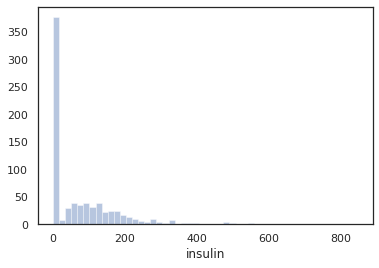

In [ ]:
sns.distplot(diabetes['insulin'], kde=False, norm_hist=False, bins=50)

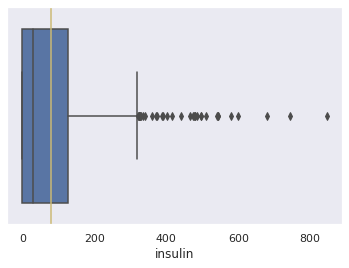

In [ ]:
sns.boxplot(x=diabetes['insulin'])
plt.axvline(diabetes['insulin'].mean(), c='y')

In [ ]:
diabetes['insulin'].groupby(pd.cut(diabetes['insulin'], 3)).count()

insulin
(-0.846, 282.0]    724
(282.0, 564.0]      39
(564.0, 846.0]       5
Name: insulin, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.skin_thickness)}')
print(f'Asimetría: {skew(diabetes.skin_thickness)}')

Curtosis: -0.5244944887652805
Asimetría: 0.109158762323673


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


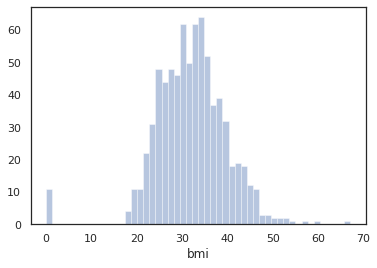

In [ ]:
sns.distplot(diabetes['bmi'], kde=False, norm_hist=False, bins=50)

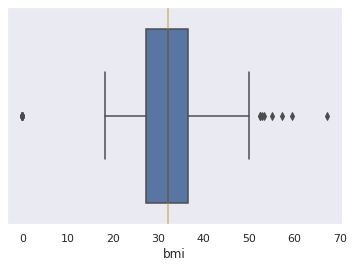

In [ ]:
sns.boxplot(x=diabetes['bmi'])
plt.axvline(diabetes['bmi'].mean(), c='y')

In [ ]:
diabetes['bmi'].groupby(pd.cut(diabetes['bmi'], 3)).count()

bmi
(-0.0671, 22.367]     51
(22.367, 44.733]     681
(44.733, 67.1]        36
Name: bmi, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.bmi)}')
print(f'Asimetría: {skew(diabetes.bmi)}')

Curtosis: 3.2612574203612645
Asimetría: -0.42814327880861786


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


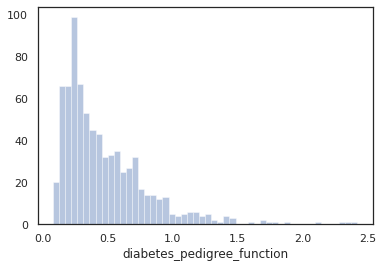

In [ ]:
sns.distplot(diabetes['diabetes_pedigree_function'], kde=False, norm_hist=False, bins=50)

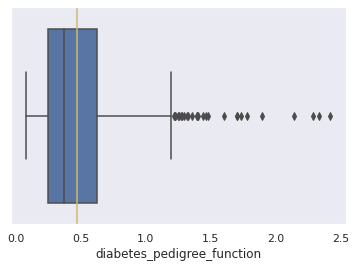

In [ ]:
sns.boxplot(x=diabetes['diabetes_pedigree_function'])
plt.axvline(diabetes['diabetes_pedigree_function'].mean(), c='y')

In [ ]:
diabetes['diabetes_pedigree_function'].groupby(pd.cut(diabetes['diabetes_pedigree_function'], 5)).count()

diabetes_pedigree_function
(0.0757, 0.546]    524
(0.546, 1.015]     194
(1.015, 1.483]      40
(1.483, 1.952]       6
(1.952, 2.42]        4
Name: diabetes_pedigree_function, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.diabetes_pedigree_function)}')
print(f'Asimetría: {skew(diabetes.diabetes_pedigree_function)}')

Curtosis: 5.550792047551205
Asimetría: 1.9161592037386292


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


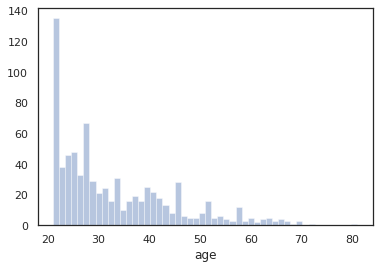

In [ ]:
sns.distplot(diabetes['age'], kde=False, norm_hist=False, bins=50)

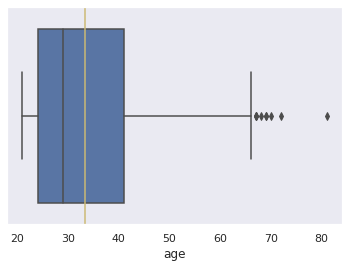

In [ ]:
sns.boxplot(x=diabetes['age'])
plt.axvline(diabetes['age'].mean(), c='y')

In [ ]:
diabetes['age'].groupby(pd.cut(diabetes['age'], 5)).count()

age
(20.94, 33.0]    474
(33.0, 45.0]     176
(45.0, 57.0]      76
(57.0, 69.0]      39
(69.0, 81.0]       3
Name: age, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.age)}')
print(f'Asimetría: {skew(diabetes.age)}')

Curtosis: 0.6311769413798585
Asimetría: 1.127389259531697


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


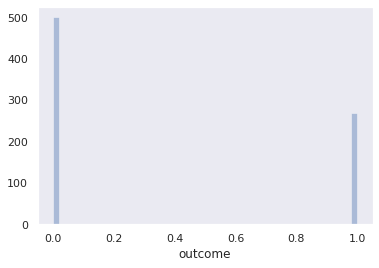

In [ ]:
sns.distplot(diabetes['outcome'], kde=False, norm_hist=False, bins=50)

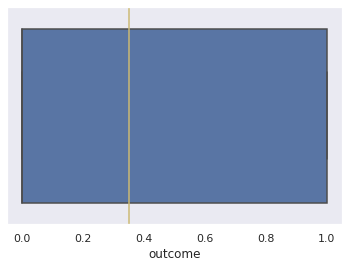

In [ ]:
sns.boxplot(x=diabetes['outcome'])
plt.axvline(diabetes['outcome'].mean(), c='y')

In [ ]:
diabetes['outcome'].groupby(pd.cut(diabetes['outcome'], 2)).count()

outcome
(-0.001, 0.5]    500
(0.5, 1.0]       268
Name: outcome, dtype: int64

In [ ]:
print(f'Curtosis: {kurtosis(diabetes.outcome)}')
print(f'Asimetría: {skew(diabetes.outcome)}')

Curtosis: -1.5983283582089547
Asimetría: 0.6337757030614577


# **RETO 4**

In [ ]:
olimpiada = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/athlete_olympic_events-clean.csv', index_col=0)

In [ ]:
olimpiada.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
